# Chapter 11. 머신러닝을 위한 데이터 준비

#### 데이터 분석을 위한 데이터 준비 단계
1. 데이터 불러오기
2. 데이터 살펴보기
3. 데이터 분할: train, test, validation ...
4. 데이터 변환: scale, normalize ...

### 1. 기본적인 데이터 분석을 위한 data set 불러오기 - boston
<br>
http://lib.stat.cmu.edu/datasets/boston
<br>
실제 데이터 분석에서는 파일, 데이터베이스 등 다양한 소스로부터 데이터를 불러 온다.

#### 보스톤 데이터셋과 문제점

- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- scikit-learn에서 자체적으로 제공했으나 윤리적 문제로 인해 1.2부터 삭제됨
- 인종차별과 관련한 이슈가 있으며, 가급적 사용을 자제하도록 권고
- 그러나, 회귀분석과 관련해 데이터 관점에서 좋은 예를 보여주며 대체 데이터셋을 구하기 어려움
- 향후 적절한 데이터셋을 구하면 대체할 예정이며, 이러한 문제점을 이해하고 사용하기 바람

#### read_csv를 이용해 웹으로부터 데이터 불러오기

**제대로 된 데이터를 얻기 위해 해야 할 일**

- 텍스트 파일 살펴보기
  - 웹 주소로 들어가보면 윗 부분에 데이터에 대한 설명이 있고, 아래에는 데이터가 번갈아가면 있는 것을 볼 수 있음
  
```
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30
  396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80
  396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80
  392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70
  394.63   2.94  33.40
  ```

  - 텍스트 파일 분석 결과
    - 위에서부터 22줄은 필요 없는 내용: 따라서 22줄은 skip
    - 헤더(열 이름)이 없음: 컬럼명을 만들어줘야 함
    - 한 행이 두 줄로 번갈아가며 쓰여 있음: 두 줄을 합쳐서 하나의 행을 만들어야 함
    - 마지막 변수 MEDV가 target 변수이고 나머지가 input 변수임: 마지막 변수는 별도의 데이터 프레임으로 분리
    - 결과적으로 input 변수는 13개, target 변수는 1개


In [1]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
print(data.shape, target.shape)

(506, 13) (506,)


In [3]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
len(feature_names)

13

### 2. 데이터 살펴보기
<br>
목적: 데이터가 어떤 모양인지와 데이터 간의 연관성 등을 파악한다.
<br>
이를 위해서는 그래프가 필수적임: matplotlib를 사용한다.
<br>
https://matplotlib.org/tutorials/index.html

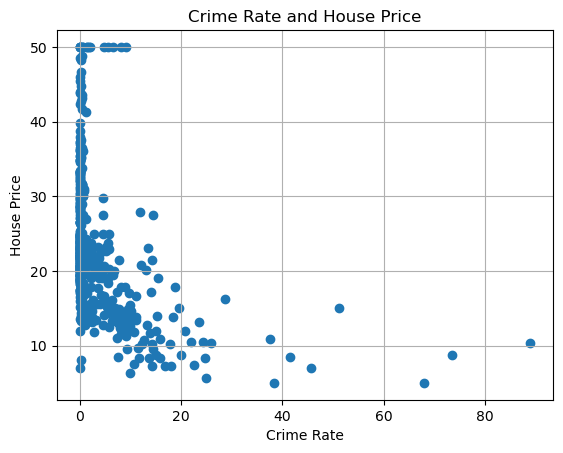

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

x = data[:,0]
y = target

#간략 버전
#plt.scatter(x, y)
#plt.show()

fig, ax = plt.subplots() #전체 그림판과 각각의 subplot을 반환
ax.scatter(x, y)

ax.set(xlabel='Crime Rate', ylabel='House Price',
       title='Crime Rate and House Price') #개별적인 subplot에 대해 설정
ax.grid()
plt.show()
#fig.savefig("test.png") #전체 그림판을 저장


In [5]:
# ravel()의 역할 이해 
import numpy as np
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
print(a.ravel())

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


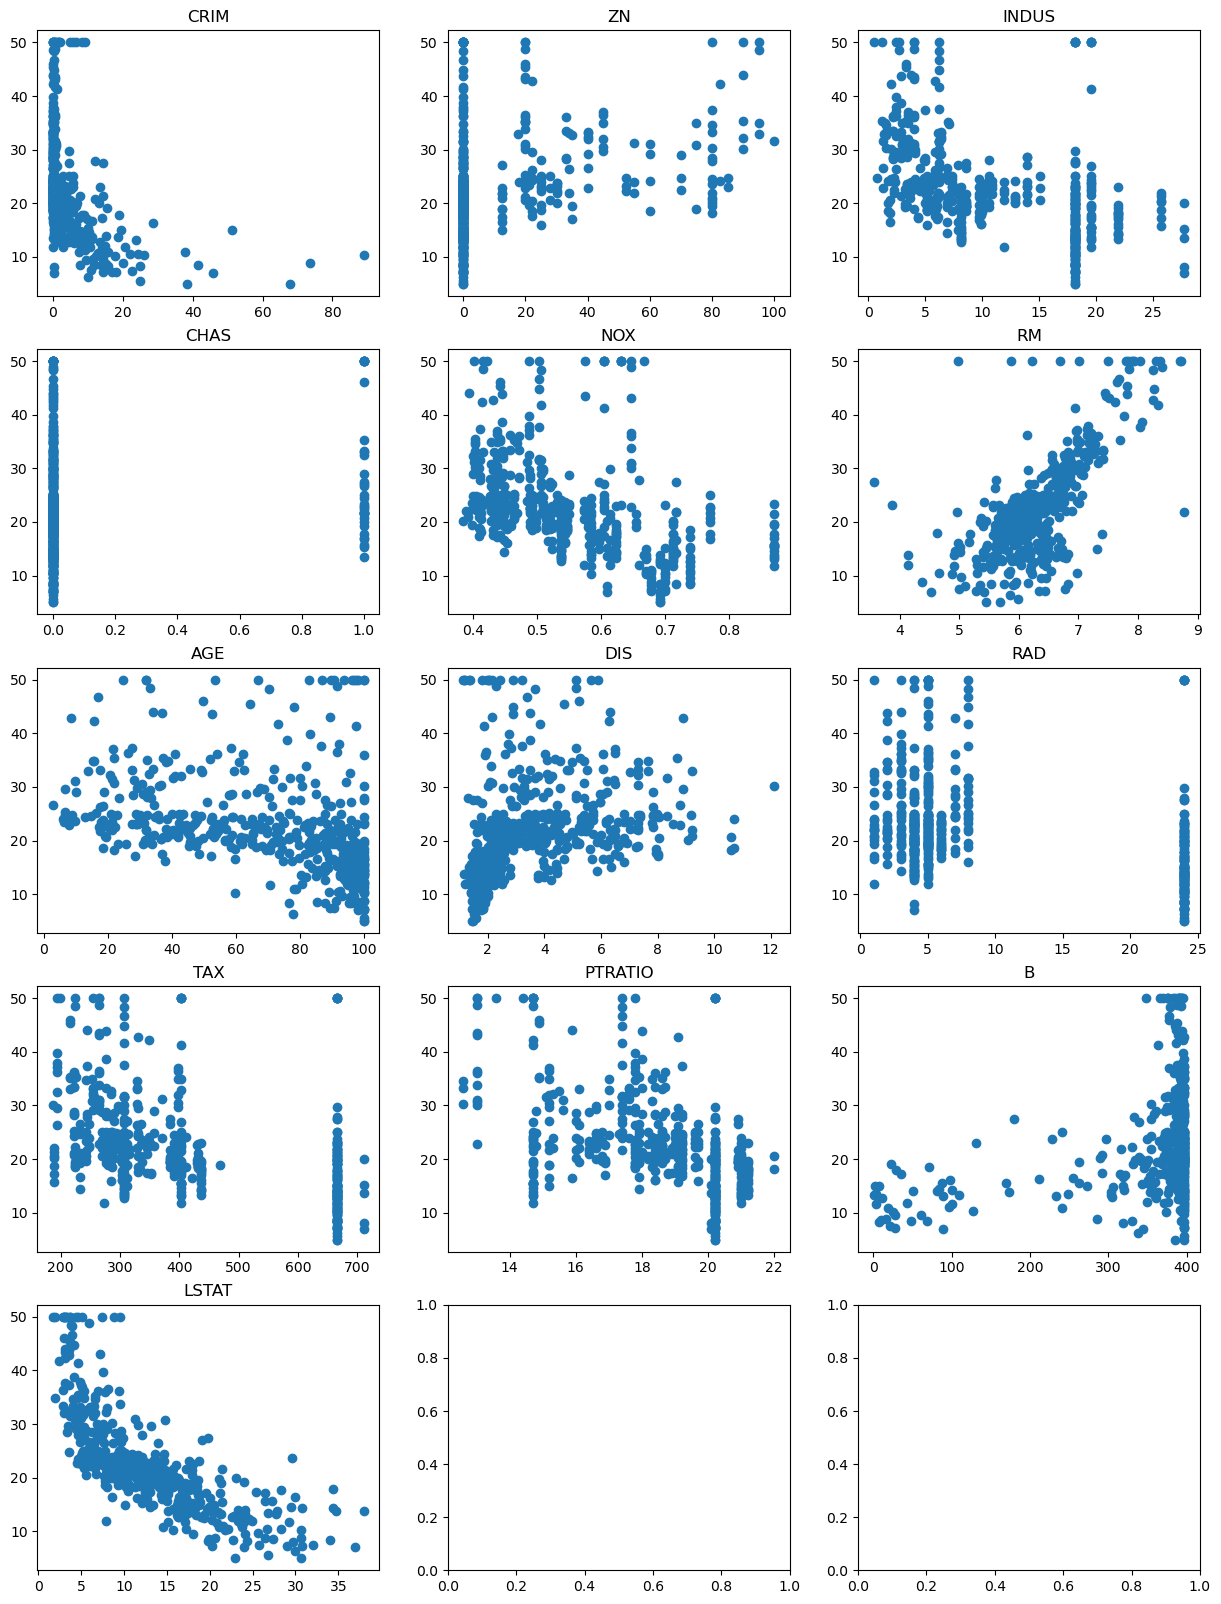

In [6]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
y = target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해, ravel()은 ndarray를 flat하게 바꿈
    if i < data.shape[1]: #그려야 할 변수는 13개인데 subplot의 수는 3*5 = 15개
        # 즉 그려야 할 변수에 대해서만 그래프를 그림
        x = data[:,i] # 대상이 되는 변수만 x에 골라냄

        ax.set_title(feature_names[i]) # subplot의 제목을 변수의 이름으로
        ax.scatter(x, y)
plt.show()

### 3. 데이터 분할
<br>
목적: 학습용 데이터와 검증용 데이터로 분리해서 올바르게 학습되었는지 확인한다.
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>일반적으로 머신러닝은 학습용 데이터에 과적합되는 경향이 있다.
<br>즉, 학습용 데이터에서만 예측이 잘 되고 일반화는 잘 안되는 경향이 있다.
<br>극단적인 예를 들어, 키를 이용해서 몸무게를 예측하는 상황에서 만일 데이터에 키가 크고 마른 사람들과 키가 작고 뚱뚱한 사람들만 우연히 들어와있다면 이것으로 학습을 해봤자 일반적인 상황에는 잘 안 맞을 수 있다.
<br>그러나, 학습에 사용한 데이터에 대해서는 여전히 잘 맞는 것처럼 보인다.
<br>이와 같은 상황을 방지하기 위해서 데이터를 학습용과 검증용으로 나누어 사용하게 되고, 이 때 두 데이터 셋에는 값이 랜덤하게 들어가는 것이 중요하다.

<br>또한 data(독립변수)와 target(종속변수)는 반드시 짝을 맞춰서 나누어지고, 랜덤하게 섞여야 한다는 것을 기억해야 한다. 
<br>만일 짝이 틀려지면 전혀 의미없는 데이터가 된다.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2) #test_size를 명시하지 않으면 0.25
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### 4. 데이터 변환 (표준화: Standardize features)
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- 목적: 데이터 간 분포의 편차가 클 때, 이를 조정한다.
<br>
일반적으로는 feature 별(column별)로 독립적으로 수행하나, 상황에 따라 같은 sample 내(row별)에서 수행할 수도 있다.
<br>
상황에 따라서 수행여부 선택: 에러가 발생하거나 예측률을 향상시키고자 할 때 수행, 본 수업에서는 특별한 언급이 없으면 하지 않는다.
<br> 더 정확히 이야기하면, 사용하는 알고리즘에 따라 데이터에 대한 민감도가 다르다.<br> 예를 들어 SVM 같은 경우 각 변수 별로 분포의 편차가 크면 성능이 떨어지는 경향이 있으므로 가급적 표준화를 하는 것이 좋다. <br>실제로 결과를 비교해 보면 표준화를 하는 쪽이 성능이 우수한 경우가 많다.

- 주의사항: train과 test set 전체에 대해 fit을 하고 나눠서 사용한다고 생각할 수도 있으나, 원칙적으로 반드시 train data에 대해서만 fit을 하고 이 scaler를 이용해 test data를 transform하는 것이 정확하다.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train)) #X_train set을 대상으로 평균, 표준편차를 계산
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

print('--- train data before scaling ---')
print(X_train[:5])
scaled_X_train = scaler.transform(X_train) #계산된 평균, 표준편차를 이용하여 train set의 값을 변환
print('--- train data after scaling ---')
print(scaled_X_train[:5])

scaled_X_test = scaler.transform(X_test) #계산된 평균, 표준편차를 이용하여 test set의 값을 변환, 
# train set과 동일한 값으로 변환하는 것에 유의
print('--- test data after scaling ---')
print(scaled_X_test[:5])

StandardScaler()
scaler mean: [3.48066292e+00 1.10297030e+01 1.11728713e+01 6.93069307e-02
 5.53769307e-01 6.27146040e+00 6.84212871e+01 3.81741015e+00
 9.38118812e+00 4.06321782e+02 1.84594059e+01 3.58711609e+02
 1.26149752e+01]
scaler variance: [7.26111029e+01 5.41610504e+02 4.67890190e+01 6.45034801e-02
 1.33445152e-02 4.85245511e-01 7.87182220e+02 4.50193594e+00
 7.41764778e+01 2.77787232e+04 4.53602539e+00 7.65092208e+03
 4.99067235e+01]
--- train data before scaling ---
[[6.21100e-02 4.00000e+01 1.25000e+00 0.00000e+00 4.29000e-01 6.49000e+00
  4.44000e+01 8.79210e+00 1.00000e+00 3.35000e+02 1.97000e+01 3.96900e+02
  5.98000e+00]
 [1.31170e-01 0.00000e+00 8.56000e+00 0.00000e+00 5.20000e-01 6.12700e+00
  8.52000e+01 2.12240e+00 5.00000e+00 3.84000e+02 2.09000e+01 3.87690e+02
  1.40900e+01]
 [2.18700e-02 6.00000e+01 2.93000e+00 0.00000e+00 4.01000e-01 6.80000e+00
  9.90000e+00 6.21960e+00 1.00000e+00 2.65000e+02 1.56000e+01 3.93370e+02
  5.03000e+00]
 [4.92980e-01 0.00000e+00 9.90